In [16]:
import tensorflow as tf

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [20]:
X_train = X_train

In [21]:
X_test = X_test

In [22]:
# MLP : 입력층 => 은닉층1(300) => 은닉층2(100) => 출력층(10)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [23]:
# 모형 컴파일 : 비용(손실)함수, 최적화 알고리즘 , 지표를 설정
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs = 10, validation_split=0.1) # 에포크 수가 클수록 훈련이 더 많이 된다. 

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0993 - val_loss: nan - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.0994 - val_loss: nan - val_accuracy: 0.1050
Epoch 8/10
1688/1688 [============

In [25]:
import pandas as pd


<AxesSubplot:>

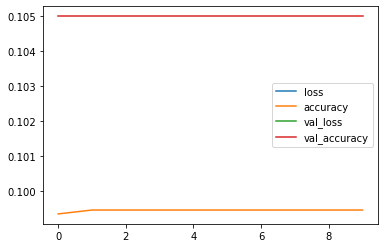

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
model.predict(X_test[:3])

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [28]:
import numpy as np

In [29]:
np.argmax(model.predict(X_test[:3]), axis = 1)

array([0, 0, 0], dtype=int64)

In [30]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

In [33]:
p = np.argmax(model.predict(X_test), axis = 1)

In [34]:
from sklearn.metrics import confusion_matrix


In [35]:
confusion_matrix(y_test, p)

array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [36]:
t = tf.convert_to_tensor([[1,2,3],[4,5,6]])

In [37]:
type(t)

tensorflow.python.framework.ops.EagerTensor

In [38]:
t

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [39]:
t.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
t_float = tf.cast(t, dtype = tf.float32)

In [42]:
t_float

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [43]:
ds = tf.data.Dataset.from_tensor_slices([5,2,7,9,3])

In [44]:
ds

<TensorSliceDataset shapes: (), types: tf.int32>

In [45]:
for ex in ds:
    print(ex)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [47]:
# 지도학습 : 특성행렬, 레이블벡터

In [48]:
# 2개의 데이터셋을 하나의 데이터셋으로 연결하기 : X에 y붙이기 
X = tf.data.Dataset.from_tensor_slices([[1,2,3],[4,5,6],[7,8,9]])

In [49]:
y = tf.data.Dataset.from_tensor_slices([0,1,0])

In [50]:
my_ds = tf.data.Dataset.zip((X,y))

In [51]:
my_ds

<ZipDataset shapes: ((3,), ()), types: (tf.int32, tf.int32)>

In [52]:
for ex in ds:
    print(ex)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [53]:
for ex in my_ds:
    print(ex[0].numpy(), ex[1].numpy())

[1 2 3] 0
[4 5 6] 1
[7 8 9] 0
